---
# Part 3 of Practical Stats for Data Scientists, reworked for Python
---

This notebook assumes that the datasets referenced in Stats4DS.ipynb have been loaded.

The notebook picks up at Chapter 6 Logistics Regression

---
## Introduction

In [1]:
%matplotlib inline

In [2]:
# get numerical and data mgt modules
import numpy as np
import pandas as pd

# import graphics modules
import matplotlib.pyplot as plt
import seaborn as sns

# import machine learning modules
import sklearn.linear_model
import sklearn.metrics
import sklearn.feature_selection
import sklearn.neighbors
import sklearn.tree

# import statistics modules (statsmodeles supressed until needed) because of warning message)
#import statsmodels.api as sm
from scipy import stats

---
## K Means Example

### Load Data

In [3]:
loans_df = pd.read_csv('data/loan200.csv')

In [4]:
loans_df.head()

,outcome,payment_inc_ratio,dti
0,target,9.00000,22.50
1,default,5.46933,21.33
2,paid off,6.90294,8.97
3,paid off,11.14800,1.83
4,default,3.72120,10.81


In [5]:
loans_df['outcome'].unique()

array(['target', 'default', 'paid off'], dtype=object)

### Visualize Data

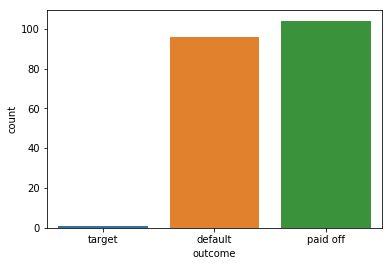

In [6]:
sns.countplot(x='outcome', data=loans_df)

In [7]:
loans2_df = loans_df.iloc[1:]

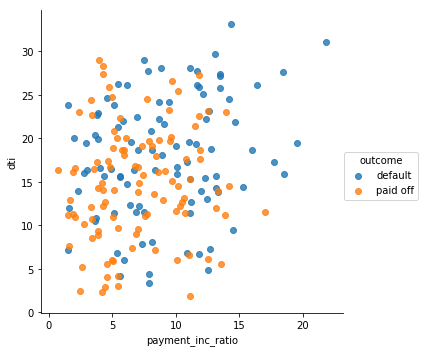

In [8]:
sns.lmplot(y='dti', x='payment_inc_ratio', hue='outcome', data=loans2_df, fit_reg=False)

In [9]:
loans3_df = loans2_df.copy()
loans3_df['code'] = 0
loans3_df['code'] = loans3_df['code'].where(loans3_df['outcome']=='paid off', 1)

In [10]:
loans3_df.head()

,outcome,payment_inc_ratio,dti,code
1,default,5.46933,21.33,1
2,paid off,6.90294,8.97,0
3,paid off,11.14800,1.83,0
4,default,3.72120,10.81,1
5,paid off,1.89923,11.34,0


In [11]:
neigh = sklearn.neighbors.KNeighborsClassifier(n_neighbors=20)

In [12]:
X = loans3_df[['dti', 'payment_inc_ratio']]
y = loans3_df['code']

neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [13]:
X_new = [[22.5, 9]]
print(neigh.predict(X_new))
print(neigh.predict_proba(X_new))

[0]
[[0.55 0.45]]


In [14]:
X.head()

,dti,payment_inc_ratio
1,21.33,5.46933
2,8.97,6.90294
3,1.83,11.14800
4,10.81,3.72120
5,11.34,1.89923


Text(0.5,1,'20 Nearest Neighbors to Test Point')

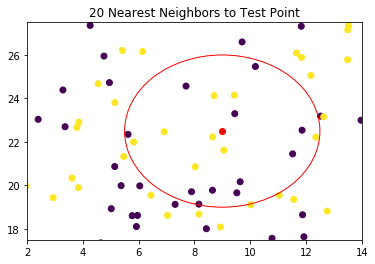

In [15]:
plt.scatter(y=X['dti'], x = X['payment_inc_ratio'], c=loans3_df['code'])
plt.scatter(y=22.5, x=9, color='r')
plt.xlim((2,14))
plt.ylim((17.5, 27.5))
circle=plt.Circle( (9,22.5), 3.5, color='r', fill=False)
fig = plt.gcf()
ax = fig.gca()
ax.add_artist(circle)
ax.set_title('20 Nearest Neighbors to Test Point')

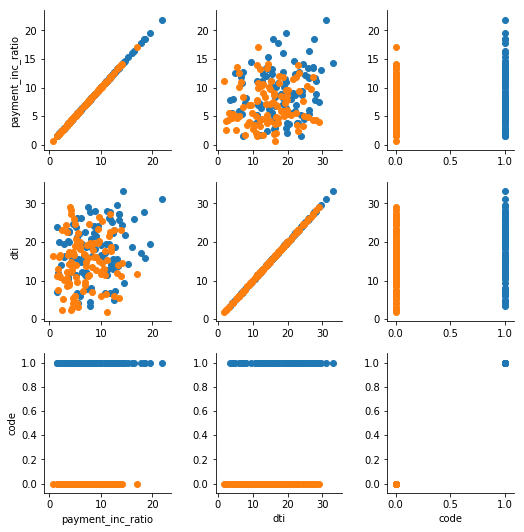

In [16]:
g = sns.PairGrid(loans3_df, hue='outcome')
g = g.map(plt.scatter)

---
## Decision Tree Example

This is not from the book, buts just to ensure correctness of simple __sklearn__ Decision Tree usage.

In [17]:
n_samples = 100
x1 = 2.0*np.random.normal(size=n_samples)
x2 = 3.0*np.random.normal(size=n_samples)
x3 = 1.0*np.random.normal(size=n_samples)
x4 = 5.0*np.random.normal(size=n_samples)

# y depends on x1, x2 only

y = [1 if v1>-0.5 and v2>0 else 0 for v1, v2 in zip(x1, x2)]

In [18]:
ex_df = pd.DataFrame(data = {'y':y, 'x1':x1, 'x2':x2, 'x3':x3, 'x4':x4})

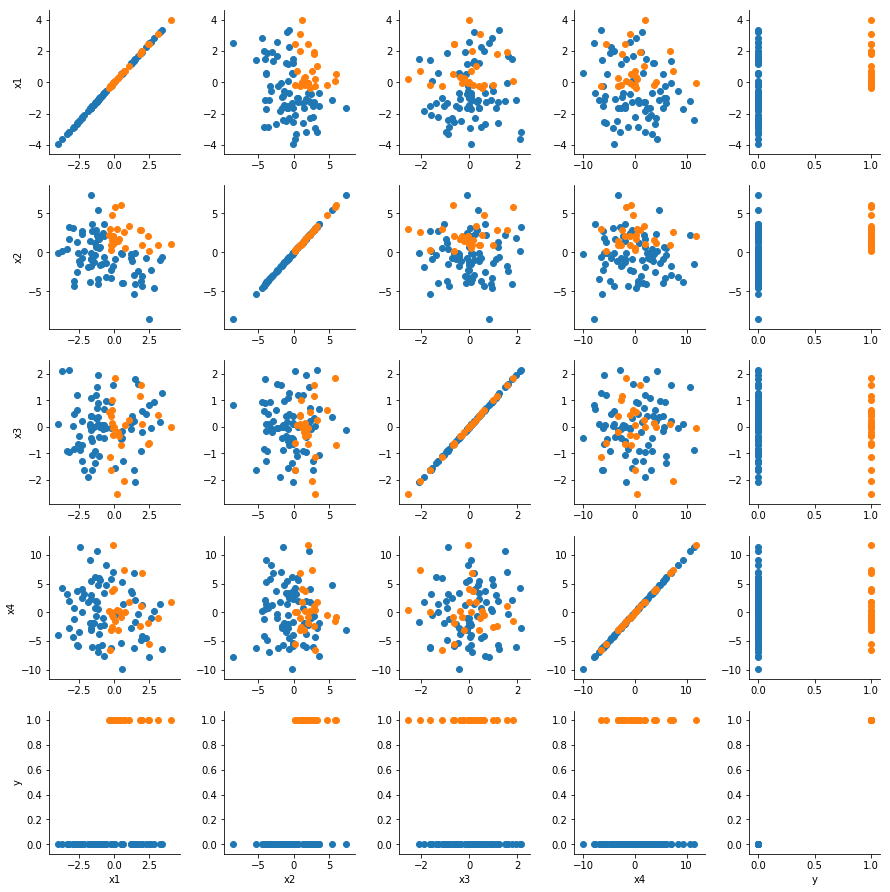

In [19]:
g = sns.PairGrid(ex_df, hue="y")
g.map(plt.scatter)

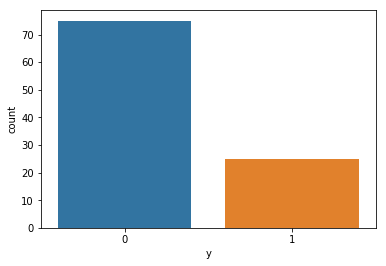

In [20]:
sns.countplot(x='y', data = ex_df)

In [21]:
clf = sklearn.tree.DecisionTreeClassifier()

In [22]:
ex2_df = ex_df[['x1', 'x2', 'x3', 'x4']]
clf.fit(ex2_df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
y3 = clf.predict(ex2_df)

In [24]:
sklearn.metrics.confusion_matrix(y, y3)

array([[75,  0],
       [ 0, 25]], dtype=int64)

In [25]:
print(clf.n_features_)

4


In [26]:
print(clf.classes_)
print(clf.feature_importances_)

[0 1]
[0.33333333 0.66666667 0.         0.        ]


In [27]:
np.sum(ex_df['y'])

25

### Visualization of Decision Tree ###

__sklearn__ can export a representation of the tree in `%%dot` format, which gvmagic can render as a svg graphic

In [28]:
%reload_ext gvmagic

#### Show the default tree representation

In [29]:
print(sklearn.tree.export_graphviz(clf, out_file=None) )

digraph Tree {
node [shape=box] ;
0 [label="X[0] <= -0.474\ngini = 0.375\nsamples = 100\nvalue = [75, 25]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[1] <= 0.027\ngini = 0.5\nsamples = 50\nvalue = [25, 25]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.0\nsamples = 25\nvalue = [25, 0]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 25\nvalue = [0, 25]"] ;
2 -> 4 ;
}


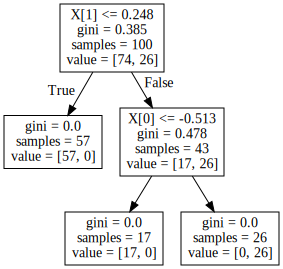

In [30]:
%%dot

digraph Tree {
node [shape=box] ;
0 [label="X[1] <= 0.248\ngini = 0.385\nsamples = 100\nvalue = [74, 26]"] ;
1 [label="gini = 0.0\nsamples = 57\nvalue = [57, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[0] <= -0.513\ngini = 0.478\nsamples = 43\nvalue = [17, 26]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.0\nsamples = 17\nvalue = [17, 0]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 26\nvalue = [0, 26]"] ;
2 -> 4 ;
}

#### Show the class names (in this case 0, 1)

In [31]:
ex_df.columns.values

array(['x1', 'x2', 'x3', 'x4', 'y'], dtype=object)

In [32]:

print(sklearn.tree.export_graphviz(clf, out_file=None, feature_names = ex_df.columns.values[0:4], class_names = ['0', '1']) )

digraph Tree {
node [shape=box] ;
0 [label="x1 <= -0.474\ngini = 0.375\nsamples = 100\nvalue = [75, 25]\nclass = 0"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0]\nclass = 0"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="x2 <= 0.027\ngini = 0.5\nsamples = 50\nvalue = [25, 25]\nclass = 0"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.0\nsamples = 25\nvalue = [25, 0]\nclass = 0"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 25\nvalue = [0, 25]\nclass = 1"] ;
2 -> 4 ;
}


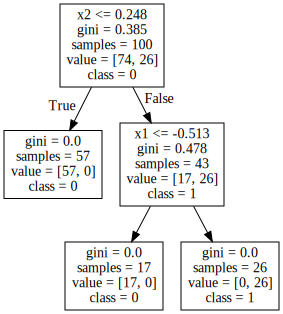

In [33]:
%%dot


digraph Tree {
node [shape=box] ;
0 [label="x2 <= 0.248\ngini = 0.385\nsamples = 100\nvalue = [74, 26]\nclass = 0"] ;
1 [label="gini = 0.0\nsamples = 57\nvalue = [57, 0]\nclass = 0"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="x1 <= -0.513\ngini = 0.478\nsamples = 43\nvalue = [17, 26]\nclass = 1"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.0\nsamples = 17\nvalue = [17, 0]\nclass = 0"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 26\nvalue = [0, 26]\nclass = 1"] ;
2 -> 4 ;
}

### Now scatter plot with decision tree boundaries

#### First, a simple scatter plot, showing class membership

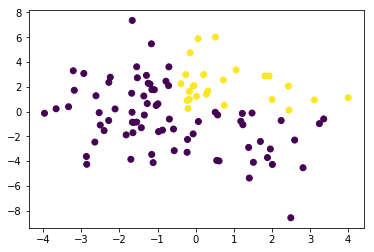

In [34]:
plt.scatter(x=ex_df['x1'], y=ex_df['x2'], c=y3)

#### Now, create a grid in x1, x2 space, and predict the class membership value at each grid point

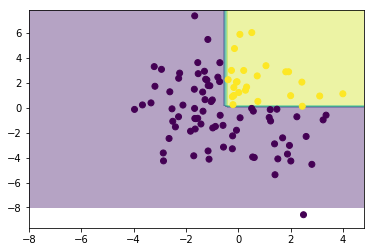

In [35]:
# the size of the mesh we are going to put over the scatter plot, showing decision tree regions
plot_step=0.2

#  create x,y mesh  (lazy, max/ min /x/y judged by eye)
xx, yy = np.meshgrid(np.arange(-8.0, 5.0, plot_step),
                     np.arange(-8.0, 8.0, plot_step))

#  create a list of feature tuples to predict; as only x1, x2 in decision tree set x3, x4 to zero (could be any value)
XX = [[v1, v2, 0.0, 0.0] for v1, v2 in zip(xx.ravel(), yy.ravel()) ]

# predict the value at each grid point  ( a list of predictions)
ZZ = clf.predict(XX)

# turn the predition list back into a grid of values, matching our xx, yy grid
ZZ = ZZ.reshape(xx.shape)

# fill the contours with color
cs = plt.contourf(xx,yy, ZZ, alpha=0.4)

# plot the original points
plt.scatter(x=ex_df['x1'], y=ex_df['x2'], c=y)


### Plot Decision Tree Boundaries

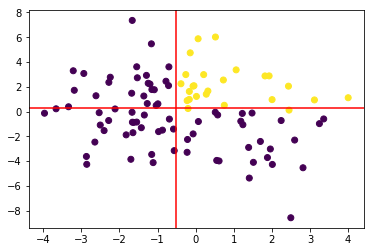

In [36]:
# plot the original points
plt.scatter(x=ex_df['x1'], y=ex_df['x2'], c=y)

# add the decision tree lines
plt.axvline(-0.513, color='r')
plt.axhline(0.248, color='r')

### Copy-Pasted code to print a textual representation of the Decision Tree

In [37]:
print(xx.shape, yy.shape)

(80, 65) (80, 65)


In [38]:
clf.predict_proba([[0,0,0,0]])

array([[1., 0.]])

In [39]:
clf.decision_path([[0,0,0,0]])

<1x5 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [40]:
estimator = clf

# Using those arrays, we can parse the tree structure:

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

The binary tree structure has 5 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= -0.4735563397407532 else to node 2.
	node=1 leaf node.
	node=2 test node: go to node 3 if X[:, 1] <= 0.02666774019598961 else to node 4.
		node=3 leaf node.
		node=4 leaf node.



##  Chapter 6, Tree Models sub-chapter

In [42]:
loans3000_df = pd.read_csv("data/loan3000.csv")

In [43]:
loans3000_df.head()

,Unnamed: 0,outcome,purpose_,dti,borrower_score,payment_inc_ratio
0,32109,paid off,debt_consolidation,21.23,0.40,5.11135
1,16982,default,credit_card,15.49,0.40,5.43165
2,25335,paid off,debt_consolidation,27.30,0.70,9.23003
3,34580,paid off,major_purchase,21.11,0.40,2.33482
4,14424,default,debt_consolidation,16.46,0.45,12.10320


In [44]:
loans3000_df['outcome'].unique()

array(['paid off', 'default'], dtype=object)

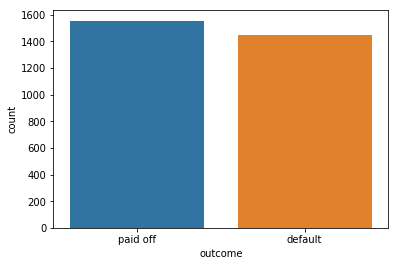

In [46]:
sns.countplot(x='outcome', data=loans3000_df)

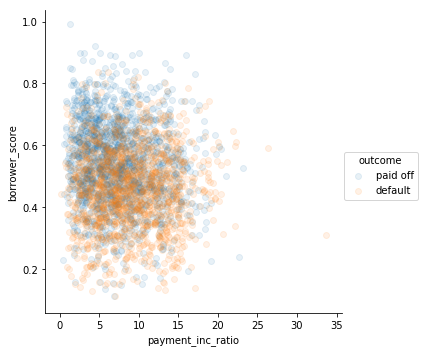

In [53]:
sns.lmplot(y='borrower_score', x='payment_inc_ratio', hue='outcome', 
           data=loans3000_df, fit_reg=False, y_jitter=0.1,  scatter_kws={'alpha':0.1})

In [58]:
loans3000_df.columns.values[1:]

array(['outcome', 'purpose_', 'dti', 'borrower_score',
       'payment_inc_ratio'], dtype=object)

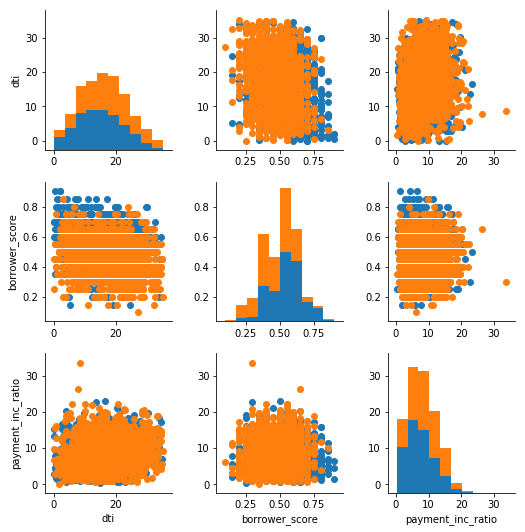

In [62]:
g = sns.PairGrid(loans3000_df[loans3000_df.columns.values[1:]], hue='outcome')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

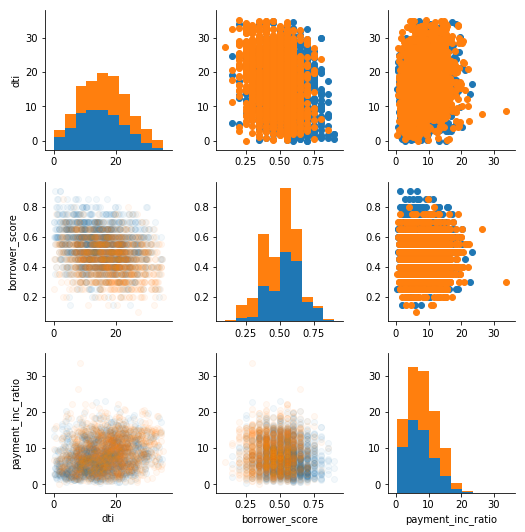

In [67]:
g = sns.PairGrid(loans3000_df[loans3000_df.columns.values[1:]], hue='outcome')
g = g.map_diag(plt.hist)
g = g.map_upper(plt.scatter)
g = g.map_lower(plt.scatter,   alpha=0.05)

In [68]:
l3000_outcomes = [1 if y=='paid off' else 0 for y in loans3000_df['outcome']]

In [72]:
len(l3000_outcomes)

3000

In [69]:
l3000_outcomes[: 10]

[1, 0, 1, 1, 0, 1, 0, 1, 1, 1]

In [82]:
clf = sklearn.tree.DecisionTreeClassifier(max_depth=3)

In [83]:
l3_df = loans3000_df[['borrower_score',  'payment_inc_ratio']]
clf.fit(l3_df,l3000_outcomes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
print(sklearn.tree.export_graphviz(clf, out_file=None) )

digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 0.575\ngini = 0.499\nsamples = 3000\nvalue = [1445, 1555]"] ;
1 [label="X[0] <= 0.375\ngini = 0.493\nsamples = 2122\nvalue = [1184, 938]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[0] <= 0.325\ngini = 0.405\nsamples = 483\nvalue = [347, 136]"] ;
1 -> 2 ;
3 [label="gini = 0.338\nsamples = 265\nvalue = [208, 57]"] ;
2 -> 3 ;
4 [label="gini = 0.462\nsamples = 218\nvalue = [139, 79]"] ;
2 -> 4 ;
5 [label="X[1] <= 10.423\ngini = 0.5\nsamples = 1639\nvalue = [837, 802]"] ;
1 -> 5 ;
6 [label="gini = 0.499\nsamples = 1157\nvalue = [547, 610]"] ;
5 -> 6 ;
7 [label="gini = 0.479\nsamples = 482\nvalue = [290, 192]"] ;
5 -> 7 ;
8 [label="X[1] <= 9.191\ngini = 0.418\nsamples = 878\nvalue = [261, 617]"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
9 [label="X[0] <= 0.725\ngini = 0.347\nsamples = 600\nvalue = [134, 466]"] ;
8 -> 9 ;
10 [label="gini = 0.372\nsamples = 518\nvalue = [128, 390]"] ;


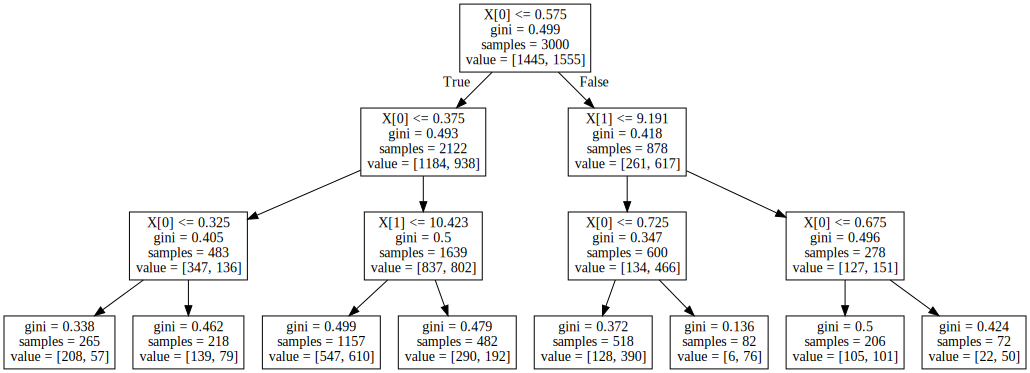

In [85]:
%%dot  
digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 0.575\ngini = 0.499\nsamples = 3000\nvalue = [1445, 1555]"] ;
1 [label="X[0] <= 0.375\ngini = 0.493\nsamples = 2122\nvalue = [1184, 938]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[0] <= 0.325\ngini = 0.405\nsamples = 483\nvalue = [347, 136]"] ;
1 -> 2 ;
3 [label="gini = 0.338\nsamples = 265\nvalue = [208, 57]"] ;
2 -> 3 ;
4 [label="gini = 0.462\nsamples = 218\nvalue = [139, 79]"] ;
2 -> 4 ;
5 [label="X[1] <= 10.423\ngini = 0.5\nsamples = 1639\nvalue = [837, 802]"] ;
1 -> 5 ;
6 [label="gini = 0.499\nsamples = 1157\nvalue = [547, 610]"] ;
5 -> 6 ;
7 [label="gini = 0.479\nsamples = 482\nvalue = [290, 192]"] ;
5 -> 7 ;
8 [label="X[1] <= 9.191\ngini = 0.418\nsamples = 878\nvalue = [261, 617]"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
9 [label="X[0] <= 0.725\ngini = 0.347\nsamples = 600\nvalue = [134, 466]"] ;
8 -> 9 ;
10 [label="gini = 0.372\nsamples = 518\nvalue = [128, 390]"] ;
9 -> 10 ;
11 [label="gini = 0.136\nsamples = 82\nvalue = [6, 76]"] ;
9 -> 11 ;
12 [label="X[0] <= 0.675\ngini = 0.496\nsamples = 278\nvalue = [127, 151]"] ;
8 -> 12 ;
13 [label="gini = 0.5\nsamples = 206\nvalue = [105, 101]"] ;
12 -> 13 ;
14 [label="gini = 0.424\nsamples = 72\nvalue = [22, 50]"] ;
12 -> 14 ;
}

In [86]:
y3 = clf.predict(l3_df)

In [87]:
sklearn.metrics.confusion_matrix(y3, l3000_outcomes)

array([[ 742,  429],
       [ 703, 1126]], dtype=int64)